In [47]:
import numpy as np
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.providers import JobStatus


# counts = res.get_counts()

istates = np.eye(4)
istr = ['00','01','10','11']

counts = {};
for i in range(istates.shape[1]):
    circ = QuantumCircuit(2,2); 
    circ.initialize(istates[i],[0,1]); 
    circ.h(0); 
    circ.x(1); 
    circ.cx(0,1); 
    circ.measure(0,0); 
    circ.measure(1,1); 

    job = backend.run(circ, shots=2000);
    result = job.result();
    counts[istr[i]] = result.get_counts(); 

counts



{'00': {'01': 1046, '10': 954},
 '01': {'10': 1005, '01': 995},
 '10': {'11': 973, '00': 1027},
 '11': {'00': 1008, '11': 992}}

In [48]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel='ibm_quantum')
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


In [49]:
backend = service.backend('ibm_kyiv')
backend = service.least_busy(); 
print(backend)

<IBMBackend('ibm_brisbane')>


In [50]:
from qiskit.providers.fake_provider import GenericBackendV2
backend = GenericBackendV2(num_qubits=5);
print(backend)
print(backend.coupling_map)

[[0, 1], [1, 0], [0, 2], [2, 0], [0, 3], [3, 0], [0, 4], [4, 0], [1, 2], [2, 1], [1, 3], [3, 1], [1, 4], [4, 1], [2, 3], [3, 2], [2, 4], [4, 2], [3, 4], [4, 3]]


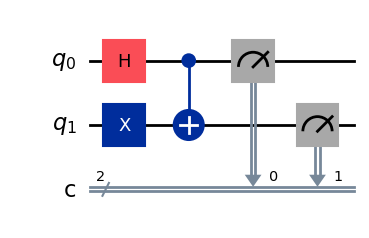

In [51]:
circ = QuantumCircuit(2,2); 
circ.h(0); 
circ.x(1); 
circ.cx(0,1); 
circ.measure(0,0); 
circ.measure(1,1); 
circ.draw("mpl")

In [52]:
print(backend.operations)

[Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), Instruction(name='rz', num_qubits=1, num_clbits=0, params=[Parameter(λ)]), Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]), Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), Instruction(name='reset', num_qubits=1, num_clbits=0, params=[]), Delay(duration=t[unit=dt]), Instruction(name='measure', num_qubits=1, num_clbits=1, params=[])]


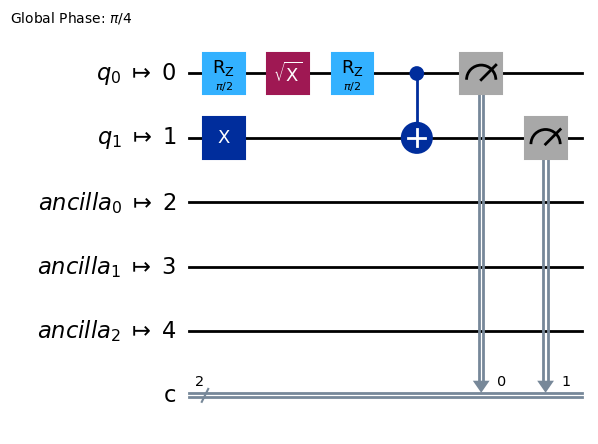

In [53]:
from qiskit import transpile 
tcirc = transpile(circ,backend); 
tcirc.draw("mpl")

In [54]:
job = backend.run(tcirc, shots=2000)

In [55]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

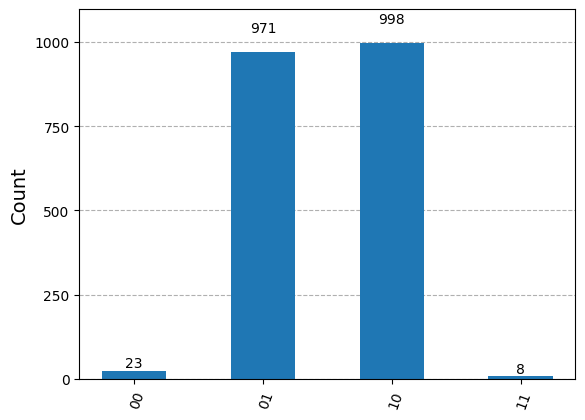

In [56]:
result = job.result(); 
counts = result.get_counts()
plot_histogram(counts)

# Laboratory 1 - Exercises

1. Write a Qiskit program to instantiate the circuit in Fig. 1. Derive the truth table by testing all possible input combinations and the equivalent unitary operator. Verify that the circuit implements an iSWAP gate using only single-qubit and CNOT gates.

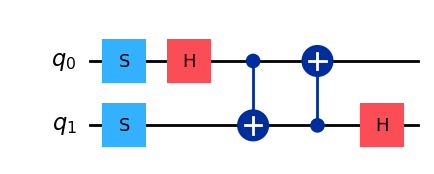

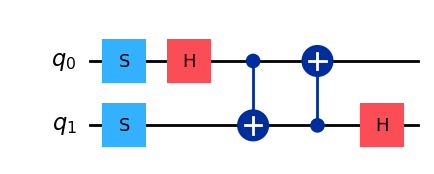

In [58]:
import numpy as np
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.providers import JobStatus

circ = QuantumCircuit(2,0)
circ.s(0)
circ.s(1)
circ.h(0)
circ.cx(0,1)
circ.cx(1,0)
circ.h(1)

# First we make sure to see if the circuit is right
circ.draw("mpl")

In [63]:
# Now we derive the equivalent unitary operator
U = Operator(circ)
print(U.data)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [65]:
# Verifying that it's equivalent to a swap
from qiskit.circuit.library import iSwapGate
from qiskit.quantum_info import process_fidelity

iswap_gate = Operator(iSwapGate())
F = process_fidelity(U,iswap_gate)
print(f'Their resemblence is: {F:.5f}, and their equivalence is: {iswap_gate==U}')

Their resemblence is: 1.00000, and their equivalence is: True


In [71]:
# Now we derive the truth table using the state vector and siulation of qiskit,
# First qiskit simulation
from qiskit_aer import AerSimulator
from qiskit.providers import JobStatus

backend = AerSimulator()

all_states = np.eye(4)
labeled_states = ['00','01','10','11']

simulated_tt = {}
for i in range(all_states.shape[1]):
    circp = QuantumCircuit(2,2)
    circp.initialize(all_states[i],[0,1])
    circp.s(0)
    circp.s(1)
    circp.h(0)
    circp.cx(0,1)
    circp.cx(1,0)
    circp.h(1)
    circp.measure(0,0)
    circp.measure(1,1)

    job = backend.run(circp, shots=10000)
    result = job.result()
    if i ==3:
        print(result)
    simulated_tt[labeled_states[i]] = result.get_counts()
    
simulated_tt     

Result(backend_name='aer_simulator', backend_version='0.15.1', qobj_id='', job_id='21cc5f4e-81b2-4118-8c3a-74ec1081acef', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 10000}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-902', qreg_sizes=[['q', 2]]), status=DONE, seed_simulator=1489763422, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.002988764, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.007409333, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 8192, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'statevector', 'required_memory_mb': 1, 'fusion': {'enabled': True, 'threshold': 14, 'applied': False, 'max_fused_qub

{'00': {'00': 10000},
 '01': {'10': 10000},
 '10': {'01': 10000},
 '11': {'11': 10000}}

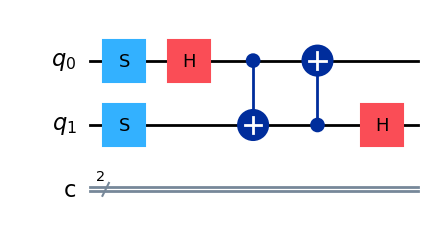

In [77]:
# Now we use the state vector 
from qiskit.quantum_info import Statevector


circp = QuantumCircuit(2,2)
circp.s(0)
circp.s(1)
circp.h(0)
circp.cx(0,1)
circp.cx(1,0)
circp.h(1)

circp.draw("mpl")

In [78]:
state_vector_tt = {}
for i in range(all_states.shape[1]):
    state_vector_tt[labeled_states[i]] = Statevector(all_states[i]).evolve(circp).data

state_vector_tt

{'00': array([ 1.00000000e+00+0.j,  0.00000000e+00+0.j, -2.23711432e-17+0.j,
         0.00000000e+00+0.j]),
 '01': array([0.-2.23711432e-17j, 0.+0.00000000e+00j, 0.+1.00000000e+00j,
        0.+0.00000000e+00j]),
 '10': array([0.+0.00000000e+00j, 0.+1.00000000e+00j, 0.+0.00000000e+00j,
        0.-2.23711432e-17j]),
 '11': array([ 0.00000000e+00+0.j, -2.23711432e-17+0.j,  0.00000000e+00+0.j,
         1.00000000e+00+0.j])}

2. A Greenberger-Horne-Zeilinger (GHZ) state is an entangled quantum state having extremely non-classical properties. For an $n$-qubit system, the GHZ state is given by:
   \begin{equation}\text{GHZ} = \frac{1}{\sqrt{2}}(|0\rangle ^{\otimes n} + (|1\rangle^{\otimes n})\end{equation}
   Write a Qiskit program implementing a quantum circuit yielding the GHZ state for a 3-qubit system initialized in the $|000\rangle$ state. (<i>Hint</i>: a possible implementation requires only 1 Hadamard gate and 2 CNOT gates). Perform experiments on a `GenericBackendV2` and compare them with the theoretical results obtained from the `Statevector` and `Operator` simulators. 

In [79]:
# First we hypothesize a circuit:
import numpy as np
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.quantum_info import Statevector

circ = QuantumCircuit(3,0)
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)
circ.draw("mpl")
Statevector.from_label('000').evolve(circ).draw("latex")



<IPython.core.display.Latex object>

In [80]:
# Now we use a statevector evolver
Three_qbit_space = np.eye(8)
three_qbit_labels = ['000','001','010','011','100','101','110','111']
ostates = {}
for i in range(Three_qbit_space.shape[1]):
    ostates[three_qbit_labels[i]] = Statevector(Three_qbit_space[i]).evolve(circ).data
ostates

{'000': array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j]),
 '001': array([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j, -0.70710678+0.j]),
 '010': array([0.        +0.j, 0.        +0.j, 0.70710678+0.j, 0.        +0.j,
        0.        +0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j]),
 '011': array([ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j, -0.70710678+0.j,  0.        +0.j,  0.        +0.j]),
 '100': array([0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j,
        0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j]),
 '101': array([ 0.        +0.j,  0.        +0.j,  0.        +0.j, -0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j]),
 '110': array([0.        +0.j, 0.70710678+0.j, 0.        +

In [82]:
O = Operator(circ)
print(O.data)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j
   

{'000': 991, '111': 1009}


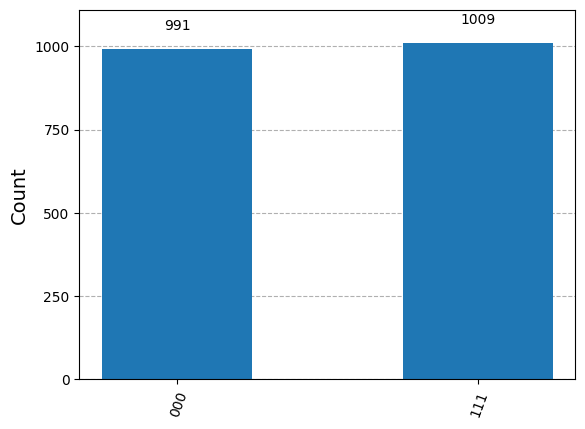

In [84]:
# Now we measure using qiskit's simulator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
backend = AerSimulator()

circ = QuantumCircuit(3,3)
circ.initialize([1,0,0,0,0,0,0,0],[0,1,2])
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)
circ.measure(0,0)
circ.measure(1,1)
circ.measure(2,2)

job = backend.run(circ, shots = 2000)
res = job.result()
counts = res.get_counts()
print(counts)
plot_histogram(counts)

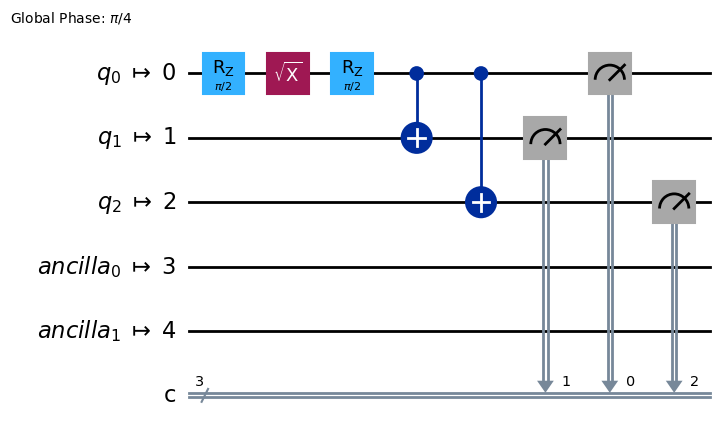

In [85]:
# Now we use backendV2
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit import transpile 

backend = GenericBackendV2(num_qubits=5);

circ = QuantumCircuit(3,3)
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)
circ.measure(0,0)
circ.measure(1,1)
circ.measure(2,2)
tcirc = transpile(circ,backend); 
tcirc.draw("mpl")

In [88]:
job = backend.run(tcirc, shots=2000)
job.status()

<JobStatus.INITIALIZING: 'job is being initialized'>

In [89]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

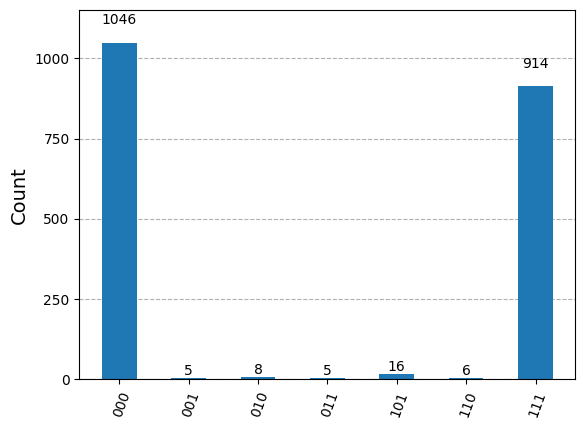

In [90]:
result = job.result(); 
counts = result.get_counts()
plot_histogram(counts)